In [1]:

try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.5MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219235 sha256=c033d4aacb934f776a4ed8eb82f4c4813a032976335a6d8fb2070b95d8b96751
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
def shuff_together(df1,df2):
    joined = pd.concat([df1,df2], axis=0)
    joined = joined.iloc[np.random.permutation(len(joined))].reset_index(drop=True)
    return joined.iloc[:df1.shape[0],:],joined.iloc[df1.shape[0]:,:].reset_index(drop=True)


def get_seq_data_2D_join(MAX_VOCAB_SIZE = 25, MAX_SEQUENCE_LENGTH = 1000):
  print("MAX_VOCAB_SIZE is",MAX_VOCAB_SIZE)
  print("MAX_SEQUENCE_LENGTH is",MAX_SEQUENCE_LENGTH)
  sentences = pd.DataFrame(' '.join(df_train.loc[i]['Joined']) for i in range(df_train.shape[0])).values.flatten()
  tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
  tokenizer.fit_on_texts(sentences)
  sequences = tokenizer.texts_to_sequences(sentences)
  print("max sequence_data length:", max(len(s) for s in sequences))
  print("min sequence_data length:", min(len(s) for s in sequences))
  s = sorted(len(s) for s in sequences)
  print("median sequence_data length:", s[len(s) // 2])

  print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))
  word2idx = tokenizer.word_index
  print('Found %s unique tokens.' % len(word2idx))
  data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data tensor:', data.shape)
  sentences_test = pd.DataFrame(' '.join(df_test.loc[i]['Joined']) for i in range(df_test.shape[0])).values.flatten()
  sequences_test = tokenizer.texts_to_sequences(sentences_test)
  print("max sequences_test length:", max(len(s) for s in sequences_test))
  print("min sequences_test length:", min(len(s) for s in sequences_test))
  s = sorted(len(s) for s in sequences_test)
  print("median sequences_test length:", s[len(s) // 2])
  data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data_test tensor:', data_test.shape)
  num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
  print("num_words is",num_words)
  return data,data_test,num_words,MAX_SEQUENCE_LENGTH,MAX_VOCAB_SIZE


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(2)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MK, KD, DK, KQ, QK, KK, KK, KK, KE, ER, RT, T..."
1,"[MS, SW, WS, SG, GL, LL, LH, HG, GL, LN, NT, T..."
2,"[MS, SL, LF, FD, DL, LF, FR, RG, GF, FF, FG, G..."
3,"[MA, AV, VA, AP, PR, RL, LF, FG, GG, GL, LC, C..."
4,"[MS, ST, TI, IQ, QS, SE, ET, TD, DC, CY, YD, D..."
...,...
6265,"[MS, SY, YF, FG, GE, EH, HF, FW, WG, GE, EK, K..."
6266,"[MT, TV, VG, GK, KS, SS, SK, KM, ML, LQ, QH, H..."
6267,"[MN, NN, NL, LS, SF, FS, SE, EL, LC, CC, CL, L..."
6268,"[MA, AP, PE, EI, IN, NL, LP, PG, GP, PM, MS, S..."


Median length of Joined sequence is 879


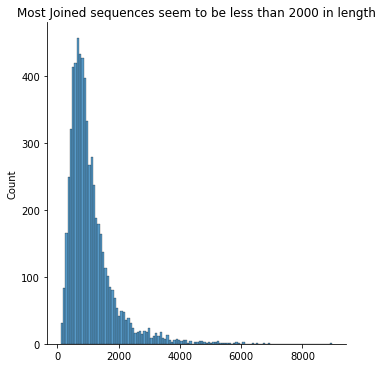

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1500
max sequence_data length: 8964
min sequence_data length: 105
median sequence_data length: 879


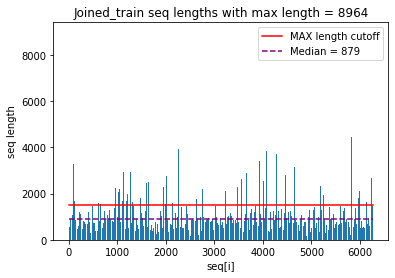

max word index: 400
Found 400 unique tokens.
pre padding.
Shape of data tensor: (6270, 1500)
max sequences_test length: 6124
min sequences_test length: 132
median sequences_test length: 899


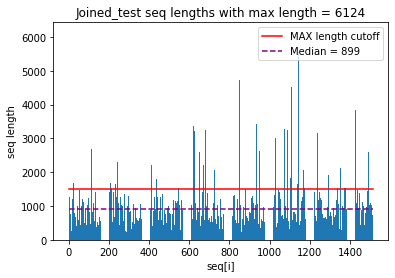

pre padding for test seq.
Shape of data_test tensor: (1514, 1500)
num_words is 401


In [10]:
data_2D_join,data_test_2D_join,num_words_2D_join,MAX_SEQUENCE_LENGTH_2D,MAX_VOCAB_SIZE_2D = f.get_seq_data_join(1000,1500,df_train,df_test,pad = 'pre', show= True)

In [11]:
EMBEDDING_DIM_2D = 5
BATCH_SIZE = 128
EPOCHS = 20
FILTERS_2D=128
KERNEL_2D =32

ip = Input(shape=(MAX_SEQUENCE_LENGTH_2D,))
x = Embedding(num_words_2D_join, EMBEDDING_DIM_2D, input_length=MAX_SEQUENCE_LENGTH_2D,trainable=True)(ip)
x = Conv1D(FILTERS_2D, KERNEL_2D, activation='relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling1D(3)(x)
x= Flatten()(x)
x = Dropout(0.2)(x)
# x = Conv1D(128, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(128, 3, activation='relu')(x)
#x = GlobalMaxPooling1D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)
model2D_CNN_join = Model(ip, output)


model2D_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model2D_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
model2D_CNN_join.fit(data_2D_join, df_train['label'].values, epochs=EPOCHS)
print(roc_auc_score(df_test['label'].values, model2D_CNN_join.predict(data_test_2D_join)))


Epoch 1/20
196/196 [==============================] - 2s 8ms/step - loss: 0.6641 - accuracy: 0.6096
Epoch 2/20
196/196 [==============================] - 1s 8ms/step - loss: 0.5718 - accuracy: 0.7077
Epoch 3/20
196/196 [==============================] - 1s 8ms/step - loss: 0.4212 - accuracy: 0.8172
Epoch 4/20
196/196 [==============================] - 2s 8ms/step - loss: 0.2493 - accuracy: 0.9068
Epoch 5/20
196/196 [==============================] - 1s 8ms/step - loss: 0.1596 - accuracy: 0.9407
Epoch 6/20
196/196 [==============================] - 2s 8ms/step - loss: 0.1082 - accuracy: 0.9646
Epoch 7/20
196/196 [==============================] - 1s 8ms/step - loss: 0.0931 - accuracy: 0.9659
Epoch 8/20
196/196 [==============================] - 1s 8ms/step - loss: 0.0614 - accuracy: 0.9791
Epoch 9/20
196/196 [==============================] - 1s 8ms/step - loss: 0.0561 - accuracy: 0.9781
Epoch 10/20
196/196 [==============================] - 2s 8ms/step - loss: 0.0456 - accuracy: 0.9829